In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler

%matplotlib inline

In [39]:
plt.rcdefaults()
plt.rcParams.update({
  'patch.linewidth': 0.5,
  'patch.facecolor': '#e37e00',
  'patch.edgecolor': '#EEEEEE',
  'patch.antialiased': True,
  'font.size': 10.0,
  'font.family': 'Khmer Sangam MN',
  'axes.facecolor': 'white',
  'axes.edgecolor': 'white',
  'axes.linewidth': '1',
  'axes.grid': True,
  'grid.linewidth': '1',
  'legend.scatterpoints': '2',
  'axes.titlesize': 'large',
  'axes.labelsize': 'large',
  'axes.labelcolor': '#555555',
  'axes.axisbelow': True,
  'axes.prop_cycle': cycler('color', ['#C10534', '#ffd200', '#e37e00', '#00887d', '#7ad2f6', '#014d64', '#938DD2']),
  'xtick.major.bottom': True,
  'xtick.minor.bottom': True,
  'xtick.major.size': 7,
  'xtick.major.pad': 2,
  'xtick.direction': 'in',
  'xtick.labelsize': 'large',
  'ytick.left': True,
  'ytick.labelsize': 'large',
  'grid.color': '#d9e6eb',
  'grid.linestyle': '-',
  'figure.facecolor': 'white'
})

In [40]:
from matplotlib.ticker import FuncFormatter

def with_commas(value, pos):
    return "{:,}".format(int(value))

formatter = FuncFormatter(with_commas)

In [2]:
df = pd.read_excel("CPD gang database 11-17.xlsx")
df.head()

,AGE,RACE,GANG_NAME,FACTION_NAME,BEAT_FIRST_ARREST,FIRST_ARREST
0,19.0,BLACK,12TH STREET PLAYERS,NaN,NaN,2016-01-01
1,20.0,WHITE,12TH STREET PLAYERS,NaN,NaN,2010-08-01
2,21.0,WHITE HISPANIC,12TH STREET PLAYERS,NaN,NaN,2012-11-01
3,22.0,WHITE HISPANIC,12TH STREET PLAYERS,NaN,NaN,2010-11-01
4,22.0,WHITE HISPANIC,12TH STREET PLAYERS,NaN,NaN,2008-08-01


In [20]:
df.head()

,AGE,RACE,GANG_NAME,FACTION_NAME,BEAT_FIRST_ARREST,FIRST_ARREST
0,19.0,Black,12Th Street Players,NaN,NaN,2016-01-01
1,20.0,White,12Th Street Players,NaN,NaN,2010-08-01
2,21.0,White Hispanic,12Th Street Players,NaN,NaN,2012-11-01
3,22.0,White Hispanic,12Th Street Players,NaN,NaN,2010-11-01
4,22.0,White Hispanic,12Th Street Players,NaN,NaN,2008-08-01


In [5]:
df.GANG_NAME.replace({'NORTH SIDERS': 'NORTHSIDERS',
                      'WHITE SUPREMIST': 'WHITE SUPREMACIST',
                      'WHITE SUPREMICIST': 'WHITE SUPREMACIST'}, inplace=True)

In [6]:
df['GANG_NAME'] = df['GANG_NAME'].str.title()

In [7]:
df['RACE'] = df['RACE'].str.title()

In [28]:
df.RACE.replace({"Asian/Pacific Islander": "Native Hawaiian and Other Pacific Islander",
    "Amer Ind/Alaskan Native": "American Indian and Alaska Native"}, inplace=True)

In [29]:
white_list = ['Dc Eagles', 'Thorndale Jagoffs', 'Northsiders', 'White Supremacist', 'Tap Boys (The Arab Posse)', 'Almighty Popes', 'Gaylords', 'Insane Popes', 'Simon City Royals', '35Th Street Crew']

# DC EAGLES
# THORNDALE JAGOFFS
# NORTH SIDERS
# NORTHSIDERS
# WHITE SUPREMIST
# WHITE SUPREMICIST
# TAP BOYS (THE ARAB POSSE)
# ALMIGHTY POPES
# GAYLORDS
# INSANE POPES
# SIMON CITY ROYALS
# 35TH STREET CREW

In [30]:
white_gangs = df[df.GANG_NAME.isin(white_list)]
white_gangs.to_csv("white_gangs.csv", index=False)

In [31]:
wdf = pd.read_csv('white_gangs.csv')
wdf.head()

,AGE,RACE,GANG_NAME,FACTION_NAME,BEAT_FIRST_ARREST,FIRST_ARREST
0,24.0,White Hispanic,35Th Street Crew,NaN,922.0,2007-05-01
1,25.0,White,35Th Street Crew,NaN,922.0,2007-04-01
2,22.0,White,Almighty Popes,NaN,811.0,2013-11-01
3,23.0,White,Almighty Popes,51ST AND LOREL,811.0,2009-01-01
4,23.0,White,Almighty Popes,51ST AND LOREL,NaN,2009-04-01


In [32]:
wdf.GANG_NAME.value_counts()

Simon City Royals            489
Gaylords                     247
Insane Popes                 163
Almighty Popes                25
White Supremacist             23
Northsiders                    9
Tap Boys (The Arab Posse)      4
Dc Eagles                      2
35Th Street Crew               2
Thorndale Jagoffs              1
Name: GANG_NAME, dtype: int64

In [33]:
wdf.GANG_NAME.value_counts().sum()

965

In [42]:
per_white = wdf.groupby('GANG_NAME')['RACE'].value_counts().unstack().reset_index().fillna(0)
per_white.sort_values(by='White', ascending=False)


RACE,GANG_NAME,American Indian and Alaska Native,Black,Black Hispanic,Native Hawaiian and Other Pacific Islander,Unknown,White,White Hispanic
6,Simon City Royals,3.0,37.0,7.0,2.0,3.0,286.0,150.0
3,Gaylords,1.0,9.0,0.0,1.0,3.0,221.0,12.0
4,Insane Popes,1.0,4.0,0.0,1.0,2.0,137.0,18.0
1,Almighty Popes,0.0,0.0,1.0,0.0,0.0,23.0,1.0
9,White Supremacist,0.0,0.0,0.0,0.0,0.0,23.0,0.0
5,Northsiders,0.0,0.0,0.0,0.0,0.0,9.0,0.0
7,Tap Boys (The Arab Posse),0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,Dc Eagles,0.0,0.0,0.0,0.0,0.0,2.0,0.0
0,35Th Street Crew,0.0,0.0,0.0,0.0,0.0,1.0,1.0
8,Thorndale Jagoffs,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [43]:
per_white.GANG_NAME.replace({'Dc Eagles': 'DC Eagles',
                      '35Th Street Crew': '35th Street Crew'}, inplace=True)

In [36]:
# amer indian, black, black hisp, native hawaii, unknown, white, white his
stack_colors = ['#e37e00', '#7ad2f6', '#00887d', '#76c0c1', '#014d64', '#C10534', '#ffd200']

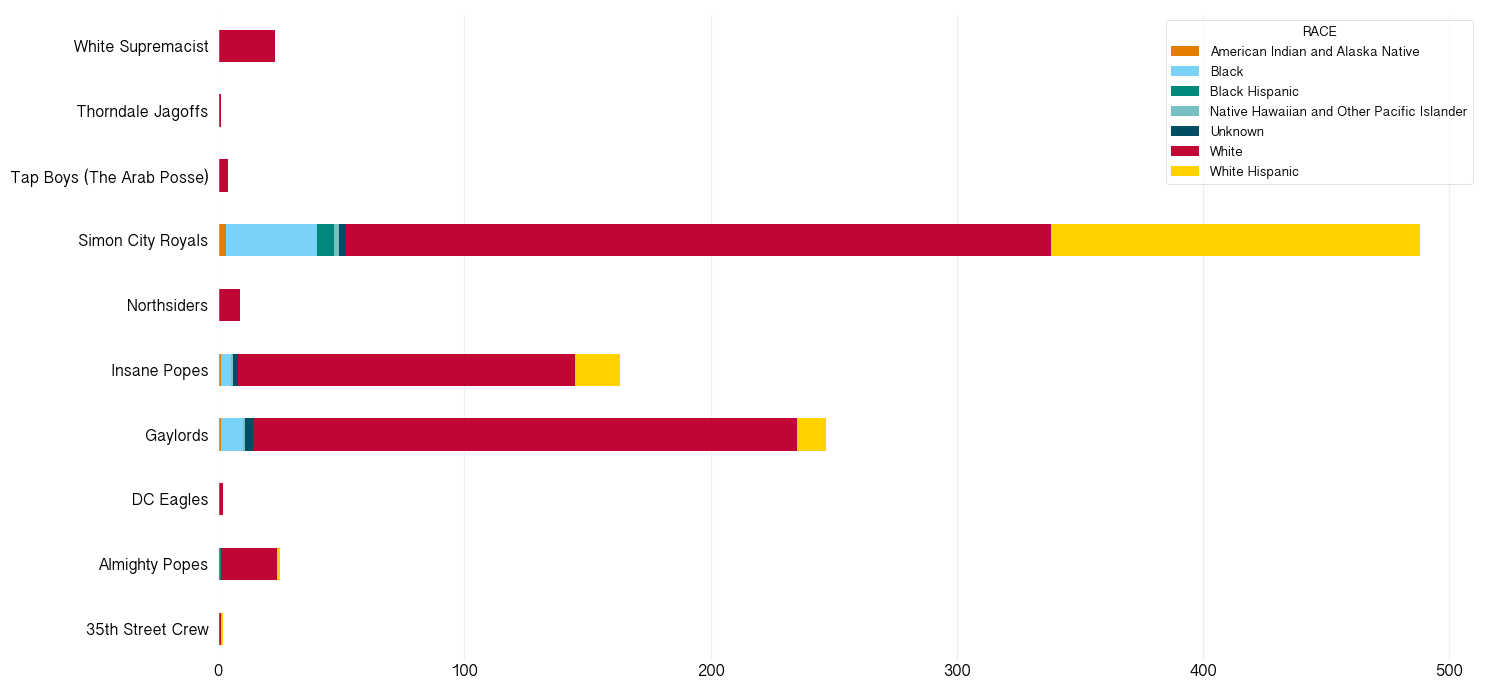

In [45]:
ax = per_white.plot(kind='barh', x='GANG_NAME', color=stack_colors, stacked=True, figsize=(15,7))

ax.xaxis.set_major_formatter(formatter)

ax.grid(False, axis='y')
ax.yaxis.label.set_visible(False)
ax.xaxis.label.set_visible(False)
ax.tick_params(which='major', left=False, bottom=False, grid_alpha=0.5)

plt.tight_layout()
plt.savefig("white_gangs_stacked.pdf", transparent=True)
plt.show()